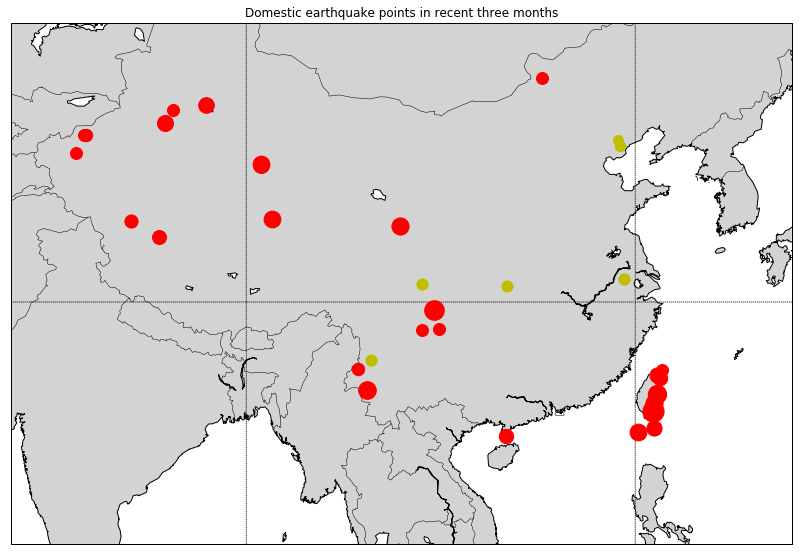

In [3]:
import matplotlib.pyplot as plt
import xlrd
from mpl_toolkits.basemap import Basemap
import numpy as np
#2_1_2
#从中国地震网上获取的excel表格 近一个月以来地震数据
import xlrd
from mpl_toolkits.basemap import Basemap
#辅助函数
def get_marker_color(mag):
    """
    :param mag:magnitude of earthquake
    :return: green(yellow,red) for small(moderate,significant) earthquake
    """
    if mag < 1.5:
        return ('go')
    elif mag < 3.0:
        return ('yo')
    else:
        return ('ro')

lons = []
lats = []
mags = []
workbook = xlrd.open_workbook('earthquake.xlsx')
Data_sheet = workbook.sheets()[0]
rowNum = Data_sheet.nrows
for i in range(1,rowNum):
    mags.append(Data_sheet.cell_value(i,1))
    lats.append(Data_sheet.cell_value(i,2))
    lons.append(Data_sheet.cell_value(i,3))
#lower left
minlon,minlat = min(lons),min(lats)
#upper right
maxlon,maxlat = max(lons),max(lats)
fig = plt.figure(figsize=(14,10))
plt.title("Domestic earthquake points in recent three months")
ax = plt.subplot(1,1,1)
eq_map = Basemap(projection='merc', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=120,
              llcrnrlon=minlon-5, llcrnrlat=minlat-8,
              urcrnrlon=maxlon+10, urcrnrlat=maxlat+3)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'lightgray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
min_marker_size = 4
for lon, lat, mag in zip(lons,lats,mags):
    x,y = eq_map(lon, lat)
    msize = mag*min_marker_size #get size
    marker_string = get_marker_color(mag) #get color
    eq_map.plot(x, y, marker_string, markersize=msize)
plt.show()